# PySDDR test run

In [1]:
# import the sddr module
from sddr import Sddr
import torch.nn as nn
import pandas as pd
import torch.optim as optim

# First use case: A Simple GAM Poisson Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [2]:
data_path = '../data/simple_gam/X.csv'
target_path = '../data/simple_gam/Y.csv'

data = pd.read_csv(data_path,delimiter=';')
target = pd.read_csv(target_path)

output_dir = './outputs'

distribution  = 'Poisson'

formulas = {'rate': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)+d1(x1)+d2(x2)'}
deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
    'batch_size': 1000,
    'epochs': 200,
    'degrees_of_freedom': {'rate': 6},
    'optimizer' : optim.RMSprop
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [3]:
sddr = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

Using device:  cpu


### The SDDR network is trained with the data defined above

Beginning training ...
Train Epoch: 0 	 Loss: 152.778381
Train Epoch: 20 	 Loss: 86.525627
Train Epoch: 40 	 Loss: 59.888226
Train Epoch: 60 	 Loss: 41.813774
Train Epoch: 80 	 Loss: 29.381832
Train Epoch: 100 	 Loss: 21.339891
Train Epoch: 120 	 Loss: 16.574991
Train Epoch: 140 	 Loss: 13.894524
Train Epoch: 160 	 Loss: 12.371344
Train Epoch: 180 	 Loss: 11.447172


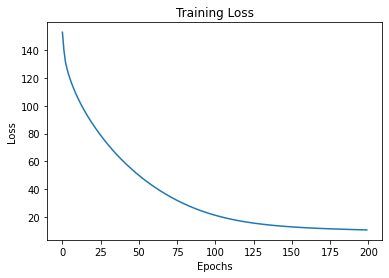

In [4]:
sddr.train(structured_data=data,
           target=target,
           plot=True)

### Visualize the partial effects

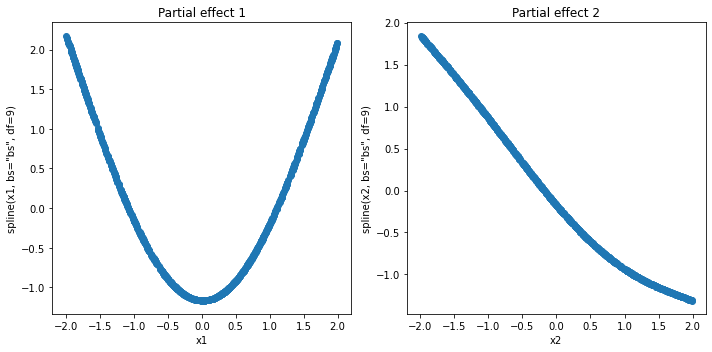

In [5]:
partial_effects = sddr.eval('rate')

### Save, load and resume

In [6]:
sddr.save('model_gam.pth')

/Users/ruolinshen/Desktop/projects/PySDDR/sddr/sddr.py:285: UserWarning: Please note that the metadata for the structured input has not been saved. If you want to load the model and use
        it on new data you will need to also give the structured data used for training as input to the load function.
  it on new data you will need to also give the structured data used for training as input to the load function.""")


In [7]:
train_parameters['epochs'] = 300
sddr_resume = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)
sddr_resume.load('./outputs/model_gam.pth', data)
sddr_resume.train(target=target, structured_data=data, resume=True)
loss_resume = sddr_resume.epoch_loss

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using device:  cpu
Loaded model ./outputs/model_gam.pth at epoch 200 with a loss 10.8652
Beginning training ...
Train Epoch: 210 	 Loss: 10.611605
Train Epoch: 240 	 Loss: 10.130367
Train Epoch: 270 	 Loss: 9.866587


### Predict on unseen data - unseen data should be within the range of the training data or use clipping

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using device:  cpu
Loaded model ./outputs/model_gam.pth at epoch 200 with a loss 10.8652


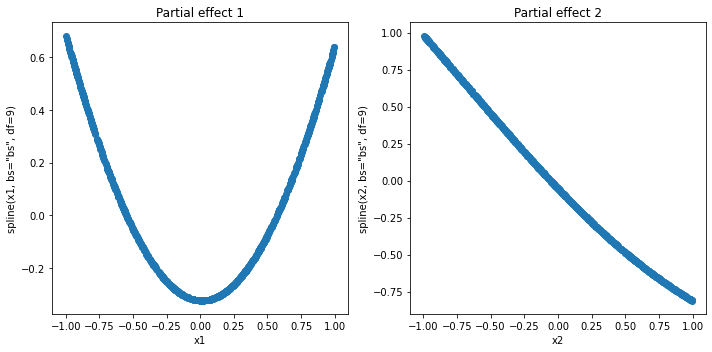

In [9]:
test_data = data/2
pred_sddr = Sddr(output_dir=output_dir,
                distribution=distribution,
                formulas=formulas,
                deep_models_dict=deep_models_dict,
                train_parameters=train_parameters)
pred_sddr.load('./outputs/model_gam.pth', data)
_, partial_effects_loaded = pred_sddr.predict(test_data, clipping=True, plot=True)

# Second use case: GAMLSS - Normal Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [13]:
# second example
data_path = '../data/gamlss/X.csv'
target_path = '../data/gamlss/Y.csv'


output_dir = './outputs'

distribution  = 'Logistic'

formulas = {'loc': '~1+spline(x1, bs="bs", df=4)+spline(x2, bs="bs",df=4) + d1(x1)+d2(x2)',
            'scale': '~1 + spline(x3, bs="bs",df=4) + spline(x4, bs="bs",df=4)'
            }

deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
    'batch_size': 1000,
    'epochs': 500,
    'degrees_of_freedom': {'loc':4, 'scale':4},
    'optimizer' : optim.RMSprop
}

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### The sddr instance is initialized with the parameters given by the user in the previous step

In [14]:
#instead of giving a data and target as data frames, here we give the path and the data is loaded automatically

sddr = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

Using device:  cpu


/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### The SDDR network is trained with the data defined above

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/ruolinshen/Desktop/projects/PySDDR/sddr/utils/utils.py:174: UserWarning: df too large: Degrees of freedom (df = 4) cannot be larger than the rank of the design matrix (rank = 4). Unpenalized base-learner with df = 4 will be used. Re-consider model specification.
  warnings.warn("""df too large: Degrees of freedom (df = {0}) cannot be larger than the rank of the design matrix (rank = {1}). Unpenalized base-learner with df = {1} will be used. Re-consider model specification.""".format(df,rank_dm))
/Users/ruolinshen/Desktop/projects/PySDDR/sddr/utils/utils.py:174: UserWarning: df too large: Degrees of 

Beginning training ...
Train Epoch: 0 	 Loss: 3.031576
Train Epoch: 50 	 Loss: 2.423968
Train Epoch: 100 	 Loss: 2.386209
Train Epoch: 150 	 Loss: 2.359276
Train Epoch: 200 	 Loss: 2.338731
Train Epoch: 250 	 Loss: 2.323177
Train Epoch: 300 	 Loss: 2.311596
Train Epoch: 350 	 Loss: 2.303448
Train Epoch: 400 	 Loss: 2.298026
Train Epoch: 450 	 Loss: 2.294706


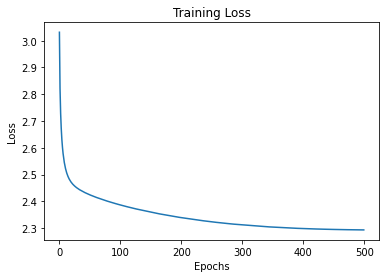

In [15]:
sddr.train(structured_data=data_path,
           target=target_path,
           plot=True)

### Visualize the partial effects

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


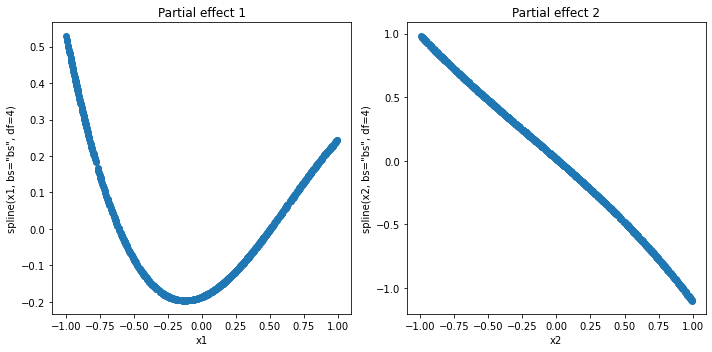

In [16]:
partial_effects = sddr.eval('loc')

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


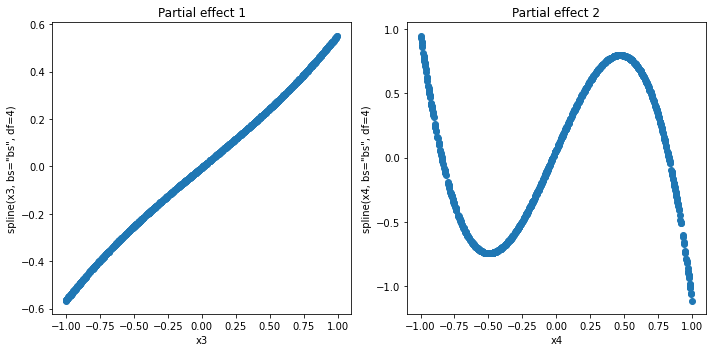

In [17]:
partial_effects = sddr.eval('scale')

In [18]:
### Predict on unseen data - unseen data should be within the range of the training data or use clipping

/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/ruolinshen/opt/anaconda3/envs/pysddr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


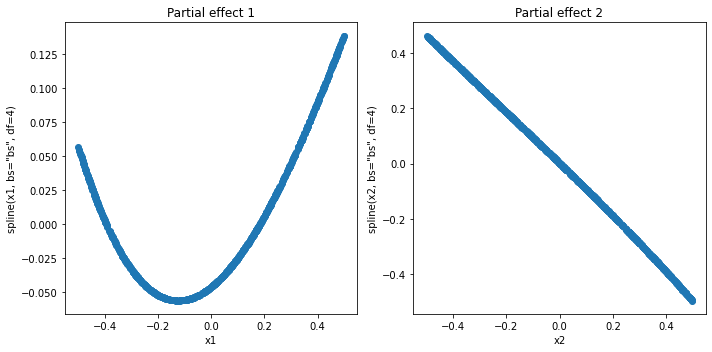

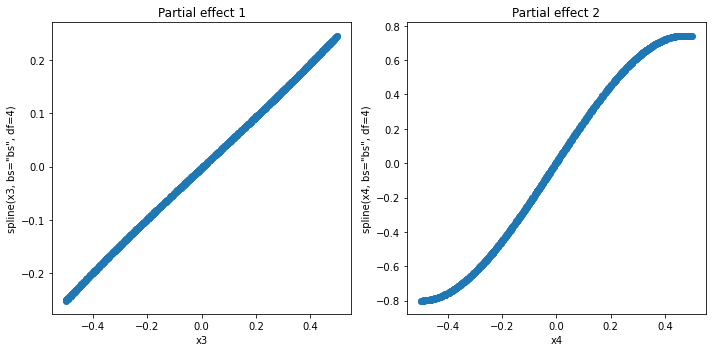

In [20]:
data = pd.read_csv(data_path,delimiter=';')
test_data = data/2
_, partial_effects_loaded = sddr.predict(test_data, clipping=True, plot=True)